In [ ]:
# ! pip install smfishHmrf numpy scipy tysserand matplotlib 
# ! pip install networkx matplotlib
# ! pip install libpysal napari

# ! pip install opencv-python==4.6.0.66

from tysserand import tysserand as ty


In [37]:
import sys, os
import sys
import math
import os
import numpy as np
import scipy
import scipy.stats
from scipy.stats import zscore
from scipy.spatial.distance import euclidean,squareform,pdist
sys.setrecursionlimit(10000)
import smfishHmrf
import smfishHmrf.reader as reader
from smfishHmrf.HMRFInstance import HMRFInstance
from smfishHmrf.DatasetMatrix import DatasetMatrix, DatasetMatrixSingleField
import tysserand as ty
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

sys.path.append('C:/Project/mosna_benchmark/benchmarking/hmrf/')
import hmrf_python_test

In [5]:
os.getcwd()

'c:\\Project\\mosna_benchmark\\benchmarking\\notebooks'

In [41]:
#setup
cortex_FDs = [0]  # Set field value, based on which to filter data

# Set directory paths and print to check if correct
base_dir = os.path.abspath("../hmrf/")
input_data_dir = os.path.join(base_dir, "data")
output_dir = os.path.join(base_dir, "output")


In [42]:
# Load data from files
# Get file containing gene names
file_genes = os.path.join(input_data_dir, "genes")
genes = reader.read_genes(file_genes)
print(genes)
print('genes' , len(genes))

# Get spatial coordinates
file_coords = os.path.join(input_data_dir, "fcortex.coordinates.txt")
spatial_coords, field = reader.read_coord(file_coords)
# Check if coordinates are stored correctly
print(spatial_coords[:5])
print('spatial_coords' , spatial_coords.shape)

['4931431F19Rik', '4932429P05Rik', 'Abca15', 'Abca9', 'Adcy4', 'Aldh3b2', 'Ankle1', 'Ano7', 'Anxa9', 'Arhgef26', 'B3gat2', 'Barhl1', 'Bcl2l14', 'Blzf1', 'Bmpr1b', 'Capn13', 'Cdc5l', 'Cdc6', 'Cdh1', 'Cecr2', 'Cilp', 'Clec5a', 'Creb1', 'Creb3l1', 'Csf2rb2', 'Ctla4', 'Cyp2c70', 'Cyp2j5', 'Dbx1', 'Dcstamp', 'Ddb2', 'Egln3', 'Fam69c', 'Fbll1', 'Foxa1', 'Foxa2', 'Foxd1', 'Foxd4', 'Galnt3', 'Gata6', 'Gdf2', 'Gdf5', 'Gm15688', 'Gm6377', 'Gm805', 'Gpc4', 'Gpr114', 'Gykl1', 'Hdx', 'Hn1l', 'Hnf1a', 'Hoxb3', 'Hoxb8', 'Hyal5', 'Kif16b', 'Laptm5', 'Lefty2', 'Lhx3', 'Lhx4', 'Lmod1', 'Mertk', 'Mgam', 'Mmgt1', 'Mmp8', 'Mrgprb1', 'Murc', 'Nell1', 'Neurod4', 'Neurog1', 'Nfkb2', 'Nfkbiz', 'Nhlh1', 'Nkd2', 'Nlrp12', 'Npy2r', 'Obsl1', 'Olr1', 'Osr2', 'Pld1', 'Pld5', 'Poln', 'Ppp1r3b', 'Psmd5', 'Rbm31y', 'Rrm2', 'Scml2', 'Senp1', 'Serpinb11', 'Sis', 'Slc4a8', 'Slc6a16', 'Spag6', 'Sumf2', 'Tnfrsf1b', 'Vmn1r65', 'Vps13c', 'Wrn', 'Zfp182', 'Zfp715', 'Zfp90', 'cpne5', 'nes', 'acta2', 'gja1', 'omg', 'nov', 'col5a

In [43]:
file_expression = os.path.join(input_data_dir, "fcortex.expression.txt")
print(file_expression)

expr = np.empty((len(genes), spatial_coords.shape[0]), dtype="float32")
for ind, g in enumerate(genes):
    expr[ind, :] = reader.read_expression(file_expression)

print(expr[:5])


c:\Project\mosna_benchmark\benchmarking\hmrf\data\fcortex.expression.txt
[[-1.    1.83  0.38 ... -1.06 -1.99 -1.69]
 [-1.    1.83  0.38 ... -1.06 -1.99 -1.69]
 [-1.    1.83  0.38 ... -1.06 -1.99 -1.69]
 [-1.    1.83  0.38 ... -1.06 -1.99 -1.69]
 [-1.    1.83  0.38 ... -1.06 -1.99 -1.69]]


In [44]:

# Filter data based on field (FD) value
good_i = np.array([i for i in range(spatial_coords.shape[0]) if field[i] in set(cortex_FDs)])
expr = expr[:,good_i]
spatial_coords = spatial_coords[good_i]
field = field[good_i]

print(field[:7])

ngene = len(genes)
ncell = spatial_coords.shape[0]

print("The number of genes is {}".format(ngene))
print("The number of cell is {}".format(ncell))



[0 0 0 0 0 0 0]
The number of genes is 125
The number of cell is 1598


In [ ]:
# Not clear why

# expr = zscore(expr, axis=1)	 #z-score per row (gene)
# expr = zscore(expr, axis=0)  #z-score per column (cell)

In [45]:
this_dset = DatasetMatrixSingleField(expr, genes, None, spatial_coords)
this_dset.test_adjacency_list([0.3, 0.5, 1], metric="euclidean")
this_dset.calc_neighbor_graph(0.3, metric="euclidean")

cutoff:0.30% #nodes:1598 #edges:3858 avg.nei:4.83
cutoff:0.50% #nodes:1598 #edges:6393 avg.nei:8.00
cutoff:1.00% #nodes:1598 #edges:12762 avg.nei:15.97


In [50]:
spatial_coords
this_dset.edges
IR = this_dset.calc_independent_region()
print(IR)

Adjacency
Edges
None


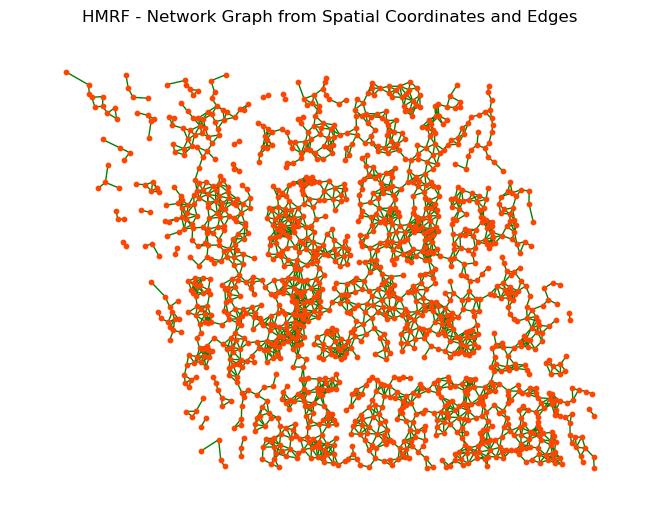

In [51]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming spatial_coords and this_dset.edges are already defined as described

# Convert array of coordinates into a position dictionary
positions = {i: (coord[0], coord[1]) for i, coord in enumerate(spatial_coords)}

# Create a graph
G = nx.Graph()
# Add edges
G.add_edges_from(this_dset.edges)

# Since the nodes might not be sequentially numbered or may not include all numbers
# between the smallest and largest, it's safe to add every node explicitly.
G.add_nodes_from(positions.keys())

# Draw the network
nx.draw(G, pos=positions, node_color='orangered', edge_color='green', node_size=10, font_size=8)

# Display the plot
plt.title('HMRF - Network Graph from Spatial Coordinates and Edges')
plt.show()


# reproduce the same with tysserand

In [34]:
from tysserand import tysserand as ty

coords = pd.DataFrame(spatial_coords)
# pairs = ty.build_delaunay(coords)
pairs = ty.build_knn(coords, k = 3)

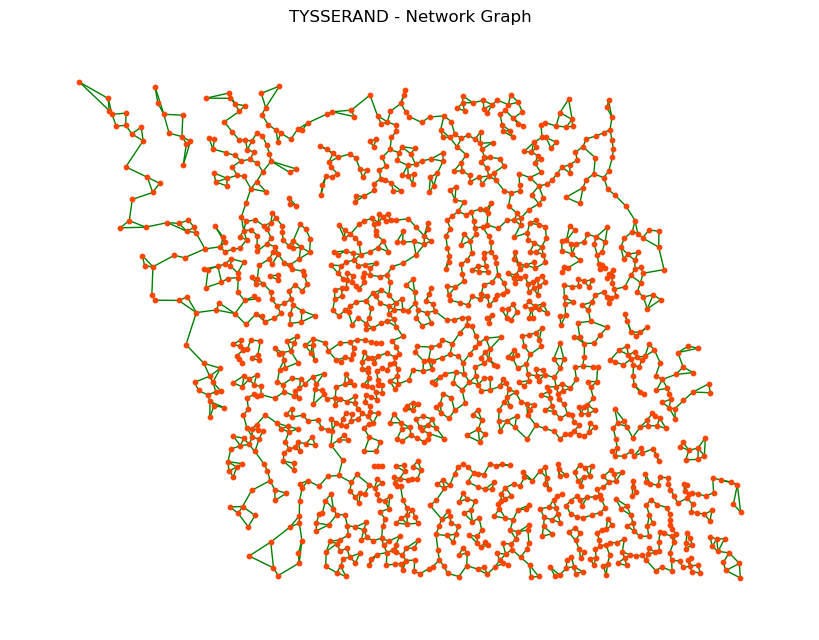

In [52]:
# Create a graph
G = nx.Graph()

# Add nodes with positions
for idx, (x, y) in coords.iterrows():
    G.add_node(idx, pos=(x, y))

# Add edges
for edge in pairs:
    G.add_edge(edge[0], edge[1])

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Plot the network
plt.figure(figsize=(8, 6))
nx.draw(G, pos=pos, node_color='orangered', edge_color='green', node_size=10, font_size=8)

plt.title("TYSSERAND - Network Graph")
plt.show()